In [80]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [81]:
fashion_mnist = keras.datasets.fashion_mnist

In [82]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [83]:
X_train_full.shape

(60000, 28, 28)

The images available here ranges from 0 to 255 pixels. Since we are about to train neural network it is important for us to scale down the images between 0 and 1
We scale down neural network inputs for the following reasons:
1. **Faster Convergence**: Gradient Descent optimizes the model by iteratively adjusting parameters based on gradients. If features are not scaled, larger values could lead to large gradient steps, causing the algorithm to overshoot the minimum, while smaller values may slow down convergence. Scaling ensures that all features contribute equally to the optimization process, speeding it up.
2. **Numerical Stability**: Neural networks involve a lot of numerical computations. If input values are very large, it may result in numerical instability, like overflow or underflow, especially with certain activation functions. Scaling keeps the values within a manageable range.
3. **Uniform Feature Influence**: Pixel intensities range from 0 to 255. By scaling them to the 0–1 range, you ensure that no particular feature (like a brighter pixel) disproportionately influences the model's weights, allowing the network to focus on relative patterns rather than absolute magnitudes.


In [84]:
#We will start by creating a validation set for our dataset
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [85]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [86]:
class_names[y_train[0]]

'Coat'

# Building a neural network


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor

In [98]:
"""model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu",kernel_initializer = "he_normal"))
model.add(keras.layers.Dense(100,activation = "relu",kernel_initializer = "he_normal"))
model.add(keras.layers.Dense(10,activation = "softmax",kernel_initializer='glorot_uniform'))"""
#Creating a neural Network with LeakyReLU function activation functions.
"""
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28,28]),
                                keras.layers.Dense(300,kernel_initializer = "he_normal"),
                                keras.layers.LeakyReLU(alpha = 0.3),
                                keras.layers.Dense(100,kernel_initializer = "he_normal"),
                                keras.layers.LeakyReLU(alpha = 0.3),
                                keras.layers.Dense(10,activation = "softmax",kernel_initializer='glorot_uniform')])
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])
"""

#Creating a neural Network using Batch Normalizaiton:
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100,kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10,activation = "softmax",kernel_initializer="glorot_uniform"),
])
"""
#Creating a neural network usning dropout optimizers.
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(10, activation="softmax")
])


Going through the code line by line:
1. The first line creates a Sqauential model. It is the simplest kind of model for keras neural network that are composed of a single stack of layers connected sequentially.

2. Next we build our first layer and add it to our model. It is a flatten layer whose role is to convert each input image into a 1D array: It recieves input X and computes X.reshape(-1,1)

3. Next we add a dense layer of 300 neurons. It will use relu Activation function. Each dense layer manages its own weight matrix, containing all the connected weights between the neuron and their inputs. It also has a vector bias term(one per neuron).

In [88]:
#Training neural network using regularizers 
"""
from functools import partial

RegularizedDense = partial(keras.layers.Dense,activation = "elu",
                            kernel_initializer ="he_normal",
                            kernel_regularizer = keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10,activation = "softmax",kernel_initializer = "glorot_uniform")
])
"""

'\nfrom functools import partial\n\nRegularizedDense = partial(keras.layers.Dense,activation = "elu",\n                            kernel_initializer ="he_normal",\n                            kernel_regularizer = keras.regularizers.l2(0.01))\n\nmodel = keras.models.Sequential([\n    keras.layers.Flatten(input_shape = [28,28]),\n    RegularizedDense(300),\n    RegularizedDense(100),\n    RegularizedDense(10,activation = "softmax",kernel_initializer = "glorot_uniform")\n])\n'

Since you will typically want to apply the same regularizer to all layers in your net‐
work, as well as using the same activation function and the same initialization strat‐
egy in all hidden layers, you may find yourself repeating the same arguments. makes the code ugly and error-prone. To avoid this, you can try refactoring your code
to use loops. Another option is to use Python’s functools.partial() function,
which lets you create a thin wrapper for any callable, with some default argument
values

In [99]:
#optimizer = keras.optimizers.SGD(learning_rate = 0.0051,momentum = 0.9,nesterov = True) # Using momentum optimizr

#optimizer = keras.optimizers.RMSprop(learning_rate=0.0051,rho = 0.9) #Using RMSprop optimizer

optimizer = keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999)

In [100]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Dense layers have a lor of parameters. The first dense layer has 784*300 connected weight + 300 additional bias weight

In [91]:
model.layers #getting model's list of layers

[<Flatten name=flatten_9, built=True>,
 <Dropout name=dropout_8, built=True>,
 <Dense name=dense_22, built=True>,
 <Dropout name=dropout_9, built=True>,
 <Dense name=dense_23, built=True>,
 <Dropout name=dropout_10, built=True>,
 <Dense name=dense_24, built=True>]

All the parameters of a layer can be accessedusing get_weights() ans set_weights() methods

In [92]:
weights, biases = model.layers[2].get_weights()

In [93]:
for var in model.layers[1].variables:
    print(var.name, var.trainable)

seed_generator_state False


In [94]:
weights

array([[ 0.0625442 , -0.02503031, -0.05754629, ...,  0.06335978,
         0.03737724,  0.05838406],
       [ 0.00315523,  0.00471869,  0.00296594, ...,  0.09095405,
         0.07212026,  0.02084675],
       [ 0.06214267,  0.00055433, -0.04703013, ...,  0.10127656,
        -0.0435399 ,  0.02527237],
       ...,
       [ 0.01606608,  0.04237801, -0.00827338, ...,  0.02651305,
        -0.06724518,  0.01675055],
       [-0.05369895,  0.02487153,  0.04366121, ..., -0.02547353,
         0.08035219, -0.08213449],
       [ 0.02237171,  0.07521538, -0.05682777, ..., -0.06000454,
         0.03289567,  0.0996177 ]], dtype=float32)

In [95]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

If you want to use another initiliazition method, you can set kernal_initializer(weights initializer) or bias_initializer

---
The shape of weighgt matrix depends on the number of inputs. That is why it is recommended to specify input_shape when creating the first layer of sequential model.
If you do not specify the input shape, Keras will simply weight until it knows the input shape before it builds the model. This will happen when you feed the data or when you call its build() method

---

After the model is created you must call its compile() function to specify the loss function and the optimizer to use.

In [101]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,metrics = ["accuracy"])

Breakdown of each part:
1. **Loss Function (`loss = "sparse_categorical_crossentropy"`):**  
   The loss function is essentially a measure of how far off your model's predictions are from the actual labels. In this case, `"sparse_categorical_crossentropy"` is used, which is particularly suited for multi-class classification problems where the target labels are provided as integers (for example, 0, 1, 2, ...). Unlike the usual categorical crossentropy (which requires one-hot encoded labels), the "sparse" version saves memory and simplifies data preparation because it deals directly with integer labels.

2. **Optimizer (`optimizer = "sgd"`):**  
   The optimizer is the algorithm that adjusts the weights of your model in order to minimize the loss function. Here, `"sgd"` stands for Stochastic Gradient Descent. It works by iteratively updating the model's parameters in the direction that minimizes the loss based on the gradient computed from a subset (or batch) of the training data.

3. **Metrics (`metrics = ["accuracy"]`):**  
   Metrics are used to monitor the performance of your model during training and evaluation. By specifying `"accuracy"`, you're instructing the model to track the proportion of predictions that match the true labels. Accuracy is one of the most intuitive and common metrics for classification tasks.


# Training and evaluating the model

fit() method also accepts callback that will let you specify a list of object that keras will call atthe end of training, at the start of each epoch and even before processing each batch. For example ModelCheckpoint callback saves checkpoint checkpoint of your model at regular intervals during training by default at the end of each epoch. Moreover if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only
 save your model when its performance on the validation set is the best so far. This
 way, you do not need to worry about training for too long and overfitting the training
 set: simply restore the last model saved after training

 Another way to implement early stopping is to simply use EarlyStopping callback. It will intrupt training when it measures no progress on the validation set for a number of epochs(defined by patience argument) and will optimally roll out the best model

In [102]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras",save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train,y_train,epochs = 100,validation_data = (X_valid,y_valid),callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6998 - loss: 0.9428 - val_accuracy: 0.7840 - val_loss: 0.6172
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7707 - loss: 0.6803 - val_accuracy: 0.8028 - val_loss: 0.6154
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7822 - loss: 0.6595 - val_accuracy: 0.8294 - val_loss: 0.5309
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7861 - loss: 0.6515 - val_accuracy: 0.8134 - val_loss: 0.5831
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7900 - loss: 0.6364 - val_accuracy: 0.8110 - val_loss: 0.5388
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7926 - loss: 0.6343 - val_accuracy: 0.8358 - val_loss: 0.6504
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7987 - loss: 0.5974 - val_accuracy: 0.8296 - val_loss: 0.6539
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7980 - los

---
If the class weight was skewed, with some class being overrepresented and underrepresentd, It would be useful to set class_weight argument when calling the fit function, which would give larger weight to underrepresented classes and lower weight to overrepresented classes

---

In [103]:
model = keras.models.load_model("my_keras_model.keras")

In [104]:
history.params

{'verbose': 'auto', 'epochs': 100, 'steps': 1719}

In [105]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [106]:
history.history

{'accuracy': [0.7419818043708801,
  0.7726908922195435,
  0.7821272611618042,
  0.7876909375190735,
  0.7926181554794312,
  0.7964727282524109,
  0.7997454404830933,
  0.800709068775177,
  0.8010545372962952,
  0.7984908819198608,
  0.8065272569656372,
  0.8029272556304932,
  0.803709089756012,
  0.807200014591217,
  0.8020727038383484,
  0.8101454377174377,
  0.8099636435508728,
  0.803709089756012,
  0.8081818222999573,
  0.8059090971946716,
  0.8112182021141052,
  0.8088363409042358,
  0.8125818371772766,
  0.8120545744895935,
  0.8166000247001648,
  0.8127999901771545,
  0.8131636381149292,
  0.8083817958831787,
  0.8096727132797241,
  0.8185454607009888,
  0.8164545297622681,
  0.8181090950965881,
  0.8194363713264465,
  0.8131999969482422],
 'loss': [0.7555586099624634,
  0.6756860613822937,
  0.6549935340881348,
  0.6528041362762451,
  0.6324759721755981,
  0.6217671036720276,
  0.6030558943748474,
  0.6056503057479858,
  0.609253466129303,
  0.6060437560081482,
  0.586882472038

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

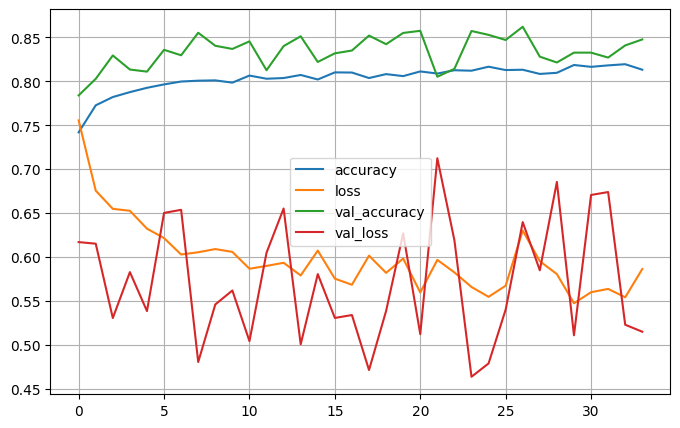

In [108]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)

In [ ]:
model.evaluate(X_test/255,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.3448


[0.34325432777404785, 0.8815000057220459]

In [ ]:
model.save("my_keras_model.keras")

In [ ]:
model = keras.models.load_model("my_keras_model.keras")

# Fine tuining neural network yperparameters

---
What does it mean to fine tune neural network Hyperparameters:
Fine-tuning neural network hyperparameters refers to the process of optimizing the parameters that control the training and architecture of a neural network to achieve better performance on a given task. Hyperparameters are not learned during training; instead, they are set prior to training and can significantly impact the model's accuracy, efficiency, and generalization.

Common Hyperparameters to Fine-Tune:

1.Learning Rate: Determines how much the weights are updated during training. A suitable learning rate ensures faster convergence without overshooting the optimal solution.


2.Batch Size: Specifies the number of samples processed before updating the model's parameters. Smaller batch sizes provide noisy updates, while larger ones offer stability but require more memory.


3.Number of Layers and Neurons: Defines the depth and width of the network, impacting its capacity to learn complex patterns.


4.Activation Functions: Controls how neurons output values, influencing non-linear learning capabilities.


5.Dropout Rate: Prevents overfitting by randomly ignoring certain neurons during training.


6.Optimizer: Algorithms like SGD, Adam, or RMSprop determine how weights are updated based on gradients.


7.Epochs: The number of complete passes through the training dataset.


Techniques for Fine-Tuning:

1.Grid Search: Tests combinations of hyperparameters systematically across a predefined range.


2.Random Search: Samples random combinations of hyperparameters within specified ranges.


3.Bayesian Optimization: Uses probabilistic models to predict promising hyperparameter configurations.


4.Manual Tuning: Adjusting hyperparameters based on domain knowledge and empirical results.


5.Fine-tuning is critical for achieving optimal model performance while balancing computational efficiency and generalization ability.

---

Inorder to use hyperparameter features from scikit-learn we need to wrap our keras model into object so that it can mimic regular scikit-learn regerssors.


The first step is to create a function that will build and compile a keras model, given its set of hyperparameters





In [ ]:
def build_model(n_hidden = 1,n_neurons = 300,learning_rate = 0.003, input_shape = [28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape = input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,kernel_initializer = "he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate,beta_1=0.9,beta_2=0.999)
  model.compile(loss = "mse",optimizer = optimizer)
  return model

This is a simple model for univariate regression( only one output neuron).
Now we create a KerasRegressor() on this build_model() function

In [ ]:
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs = 100,validation_data = (X_valid,y_valid),callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 3.3585 - val_loss: 1.8445
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.8978 - val_loss: 1.7014
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.7816 - val_loss: 1.6311
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.7085 - val_loss: 1.4772
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.6649 - val_loss: 1.5711
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.5752 - val_loss: 1.4320
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.5265 - val_loss: 1.3794
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.5030 - val_loss: 1.3795
Epoch 9/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.4583 - val_loss: 1.3718
Epoch 10/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.4059 - val_loss: 1.4967
Epoch 11/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.3958 - val_loss: 1.3418
Epoch 12/100
1719/

KerasRegressor(
	model=<function build_model at 0x79a5c11cb060>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [ ]:
mse_test = keras_reg.score(X_test/255,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse_test

0.836681604385376

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
keras_reg.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [ ]:
# Update param_distribution keys to use 'model__' prefix
param_distribution_prefixed = {
	"model__n_hidden": [0, 1, 2, 3],
	"model__n_neurons": np.arange(1, 100),
	"model__learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(
	estimator=keras_reg,
	param_distributions=param_distribution_prefixed,
	n_iter=10,
	cv=3,
	verbose=2
)
rnd_search_cv.fit(
	X_train, y_train,
	epochs=10,
	validation_data=(X_valid, y_valid),
	callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)
best_params = rnd_search_cv.best_params_
best_score = rnd_search_cv.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12.5404 - val_loss: 2.0929
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2675 - val_loss: 1.8600
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0718 - val_loss: 1.7823
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9934 - val_loss: 1.7280
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8862 - val_loss: 1.6843
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8802 - val_loss: 1.6838
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8389 - val_loss: 1.6381
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8215 - val_loss: 1.6317
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8229 - val_loss: 1.6014
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8148 - val_loss: 1.5923
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.00030553986222110014, model__n_hidden=2, mode

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 10.8450 - val_loss: 2.0338
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2178 - val_loss: 1.8637
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1277 - val_loss: 1.7740
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9980 - val_loss: 1.7320
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9473 - val_loss: 1.6779
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8667 - val_loss: 1.6589
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8117 - val_loss: 1.6425
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8209 - val_loss: 1.6116
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8047 - val_loss: 1.6052
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7930 - val_loss: 1.5760
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.00030553986222110014, model__n_hidden=2, mode

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 11.0028 - val_loss: 2.0902
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2732 - val_loss: 1.8717
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1435 - val_loss: 1.7743
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0230 - val_loss: 1.7284
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8747 - val_loss: 1.6789
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8754 - val_loss: 1.6526
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8822 - val_loss: 1.6157
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8251 - val_loss: 1.5950
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.8202 - val_loss: 1.5824
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7888 - val_loss: 1.5648
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.00030553986222110014, model__n_hidden=2, mode

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.7108 - val_loss: 1.9021
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1358 - val_loss: 1.7687
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9715 - val_loss: 1.7002
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8791 - val_loss: 1.6298
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7993 - val_loss: 1.6085
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7427 - val_loss: 1.6204
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7656 - val_loss: 1.5743
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7192 - val_loss: 1.5344
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.6707 - val_loss: 1.5613
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.6429 - val_loss: 1.5788
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.00069832249310806, model__n_hidden=2, model__n

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.7896 - val_loss: 1.8339
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0232 - val_loss: 1.6873
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9110 - val_loss: 1.6511
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8792 - val_loss: 1.6007
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7608 - val_loss: 1.5819
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7077 - val_loss: 1.5264
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7343 - val_loss: 1.5008
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6933 - val_loss: 1.4868
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6590 - val_loss: 1.4570
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6168 - val_loss: 1.4427
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.00069832249310806, model__n_hidden=2, model__n

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.6754 - val_loss: 1.8705
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0795 - val_loss: 1.7411
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9326 - val_loss: 1.6920
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8723 - val_loss: 1.6408
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8237 - val_loss: 1.5768
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7459 - val_loss: 1.5502
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7232 - val_loss: 1.5222
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7676 - val_loss: 1.5246
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7055 - val_loss: 1.5067
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6746 - val_loss: 1.4897
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.00069832249310806, model__n_hidden=2, model__n

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.1163 - val_loss: 1.6434
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8607 - val_loss: 1.6174
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7568 - val_loss: 1.5705
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7212 - val_loss: 1.5436
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6445 - val_loss: 1.5039
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6243 - val_loss: 1.4742
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6057 - val_loss: 1.5584
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5487 - val_loss: 1.4482
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5573 - val_loss: 1.3784
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4994 - val_loss: 1.4047
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.009685645045782435, model__n_hidden=2, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.3639 - val_loss: 2.4399
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8268 - val_loss: 1.8085
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7399 - val_loss: 1.5283
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6793 - val_loss: 1.4350
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6633 - val_loss: 1.5548
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6000 - val_loss: 1.5088
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5493 - val_loss: 1.4232
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5530 - val_loss: 1.4406
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5251 - val_loss: 1.4797
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5029 - val_loss: 1.4118
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.009685645045782435, model__n_hidden=2, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3046 - val_loss: 1.8156
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8847 - val_loss: 1.7355
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7603 - val_loss: 1.5331
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7293 - val_loss: 1.5458
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6160 - val_loss: 1.5668
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5634 - val_loss: 1.4467
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5321 - val_loss: 1.3841
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5071 - val_loss: 1.5129
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5641 - val_loss: 1.6901
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4806 - val_loss: 1.4624
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.009685645045782435, model__n_hidden=2, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.7588 - val_loss: 1.5431
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7588 - val_loss: 1.8040
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7035 - val_loss: 1.4231
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5724 - val_loss: 1.3701
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5349 - val_loss: 1.6734
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4618 - val_loss: 1.2930
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3638 - val_loss: 1.5687
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3814 - val_loss: 1.3413
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3342 - val_loss: 1.3522
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2924 - val_loss: 1.3620
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.017008405058705642, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.7495 - val_loss: 1.5243
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7179 - val_loss: 1.6543
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5969 - val_loss: 1.6145
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5149 - val_loss: 1.4871
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4634 - val_loss: 1.3219
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3922 - val_loss: 1.2830
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3659 - val_loss: 1.2731
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3860 - val_loss: 1.3009
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2818 - val_loss: 1.2467
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2740 - val_loss: 1.5974
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.017008405058705642, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8062 - val_loss: 1.7422
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7359 - val_loss: 1.4912
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6235 - val_loss: 1.5004
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5636 - val_loss: 1.4426
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5396 - val_loss: 1.3061
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4426 - val_loss: 1.2746
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3802 - val_loss: 1.2978
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3626 - val_loss: 1.3973
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3143 - val_loss: 1.3014
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3119 - val_loss: 1.3190
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.017008405058705642, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.8698 - val_loss: 1.8759
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7520 - val_loss: 1.5381
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6549 - val_loss: 1.4478
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5326 - val_loss: 1.4225
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4939 - val_loss: 1.4854
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4837 - val_loss: 1.2767
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4015 - val_loss: 1.6054
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3192 - val_loss: 1.3731
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3243 - val_loss: 1.4544
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2569 - val_loss: 1.2559
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.01725464998545708, model__n_hidden=3, model__n

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.8494 - val_loss: 1.8830
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7239 - val_loss: 1.4290
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5897 - val_loss: 1.4514
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5292 - val_loss: 1.3919
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4696 - val_loss: 1.3535
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4299 - val_loss: 1.4833
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3948 - val_loss: 1.7262
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3117 - val_loss: 1.3263
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2959 - val_loss: 1.3085
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2313 - val_loss: 1.2958
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.01725464998545708, model__n_hidden=3, model__n

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.8401 - val_loss: 1.6734
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8000 - val_loss: 1.5159
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6370 - val_loss: 1.4424
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5275 - val_loss: 1.3311
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4731 - val_loss: 1.4399
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4062 - val_loss: 1.4537
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3577 - val_loss: 1.3074
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3131 - val_loss: 1.6221
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2832 - val_loss: 1.2946
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2745 - val_loss: 1.6515
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.01725464998545708, model__n_hidden=3, model__n

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.8326 - val_loss: 2.1064
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2680 - val_loss: 1.9707
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1807 - val_loss: 1.9307
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1145 - val_loss: 1.8827
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1064 - val_loss: 1.8733
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0673 - val_loss: 1.8327
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0380 - val_loss: 1.8075
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9956 - val_loss: 1.7981
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0126 - val_loss: 1.7906
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9678 - val_loss: 1.7700
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0003585490096656522, model__n_hidden=1, model

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.4873 - val_loss: 2.0810
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3155 - val_loss: 1.9597
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1631 - val_loss: 1.9175
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0880 - val_loss: 1.8629
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0504 - val_loss: 1.8425
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0753 - val_loss: 1.8177
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9794 - val_loss: 1.7966
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0409 - val_loss: 1.7744
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0056 - val_loss: 1.7585
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9375 - val_loss: 1.7573
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0003585490096656522, model__n_hidden=1, model

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 11.0884 - val_loss: 2.2035
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4027 - val_loss: 2.0517
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2425 - val_loss: 1.8758
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1203 - val_loss: 1.8362
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0806 - val_loss: 1.7989
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0712 - val_loss: 1.7869
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0519 - val_loss: 1.7912
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9981 - val_loss: 1.7721
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9844 - val_loss: 1.7357
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0251 - val_loss: 1.7326
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.0003585490096656522, model__n_hidden=1, model

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.1291 - val_loss: 3.2035
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2102 - val_loss: 2.9431
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.0049 - val_loss: 2.7663
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7654 - val_loss: 2.6359
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6239 - val_loss: 2.5335
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5963 - val_loss: 2.4505
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4894 - val_loss: 2.3790
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4282 - val_loss: 2.3241
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3398 - val_loss: 2.2790
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2867 - val_loss: 2.2302
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.000425283988910615, model__n_hidden=0, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.7334 - val_loss: 3.2004
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.2116 - val_loss: 2.9277
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.9306 - val_loss: 2.7528
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7844 - val_loss: 2.6194
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6247 - val_loss: 2.5229
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5749 - val_loss: 2.4399
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4571 - val_loss: 2.3738
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3808 - val_loss: 2.3126
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2837 - val_loss: 2.2813
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2768 - val_loss: 2.2234
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step
[CV] END model__learning_rate=0.000425283988910615, model__n_hidden=0, model

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8884 - val_loss: 3.1926
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2187 - val_loss: 2.9395
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0065 - val_loss: 2.7758
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8052 - val_loss: 2.6351
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7032 - val_loss: 2.5333
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5974 - val_loss: 2.4499
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5190 - val_loss: 2.3809
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4330 - val_loss: 2.3332
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3646 - val_loss: 2.2728
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3171 - val_loss: 2.2343
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step
[CV] END model__learning_rate=0.000425283988910615, model__n_hidden=0, model__n_neurons

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5346 - val_loss: 2.2103
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2402 - val_loss: 2.0496
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1124 - val_loss: 2.1977
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1065 - val_loss: 1.9905
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0576 - val_loss: 2.1775
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0654 - val_loss: 2.0941
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0115 - val_loss: 1.9470
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1348 - val_loss: 2.0683
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1057 - val_loss: 2.3710
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0286 - val_loss: 2.4984
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step
[CV] END model__learning_rate=0.006025486403807699, model__n_hidden=0, model__n_neurons

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5013 - val_loss: 2.8019
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2212 - val_loss: 1.9947
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1270 - val_loss: 2.1005
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0826 - val_loss: 2.0036
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0939 - val_loss: 2.1897
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0533 - val_loss: 2.0924
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0310 - val_loss: 2.2811
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9969 - val_loss: 1.9519
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0361 - val_loss: 2.0687
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0390 - val_loss: 1.9546
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step
[CV] END model__learning_rate=0.006025486403807699, model__n_hidden=0, model__n_neurons

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5639 - val_loss: 2.1228
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2041 - val_loss: 2.5818
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1119 - val_loss: 1.9886
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0973 - val_loss: 1.9662
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0637 - val_loss: 1.9600
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0760 - val_loss: 1.9841
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1275 - val_loss: 2.2685
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0720 - val_loss: 1.9702
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0813 - val_loss: 2.3723
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1225 - val_loss: 1.9545
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step
[CV] END model__learning_rate=0.006025486403807699, model__n_hidden=0, model__n_neurons

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.9620 - val_loss: 1.7525
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9204 - val_loss: 1.6990
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8594 - val_loss: 1.7541
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7552 - val_loss: 1.7601
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7161 - val_loss: 1.7845
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7124 - val_loss: 1.6483
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6620 - val_loss: 1.4589
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6121 - val_loss: 1.8737
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5924 - val_loss: 1.4593
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5768 - val_loss: 1.4868
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.015684292808031366, model__n_hidden=1, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.0789 - val_loss: 1.8011
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9429 - val_loss: 1.6945
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8258 - val_loss: 1.6415
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7416 - val_loss: 1.5991
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7150 - val_loss: 1.5213
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6741 - val_loss: 2.0316
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6919 - val_loss: 1.5745
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6136 - val_loss: 1.5784
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6284 - val_loss: 1.7381
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5917 - val_loss: 1.4811
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.015684292808031366, model__n_hidden=1, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.1078 - val_loss: 1.8595
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9521 - val_loss: 1.6418
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9094 - val_loss: 1.9796
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7878 - val_loss: 1.6405
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7467 - val_loss: 1.5960
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7227 - val_loss: 1.6855
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6672 - val_loss: 1.4785
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6602 - val_loss: 1.4496
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.6685 - val_loss: 1.8492
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.6227 - val_loss: 1.9605
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.015684292808031366, model__n_hidden=1, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.6238 - val_loss: 1.7048
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7714 - val_loss: 1.5764
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7001 - val_loss: 1.4898
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5979 - val_loss: 1.4027
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5832 - val_loss: 1.3749
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5158 - val_loss: 1.3842
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4543 - val_loss: 1.3455
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4471 - val_loss: 1.3896
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3893 - val_loss: 1.3359
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3521 - val_loss: 1.3118
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.005162731338906232, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.5794 - val_loss: 1.7427
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7545 - val_loss: 1.4844
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6738 - val_loss: 1.5931
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6188 - val_loss: 1.4107
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5326 - val_loss: 1.4677
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4454 - val_loss: 1.4515
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4439 - val_loss: 1.3604
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3944 - val_loss: 1.3529
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3549 - val_loss: 1.3389
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3194 - val_loss: 1.2967
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.005162731338906232, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.1416 - val_loss: 1.5898
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7598 - val_loss: 1.7503
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6686 - val_loss: 1.5979
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5605 - val_loss: 1.4208
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5423 - val_loss: 1.3735
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5158 - val_loss: 1.3526
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4441 - val_loss: 1.3365
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4369 - val_loss: 1.3369
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3897 - val_loss: 1.3277
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3781 - val_loss: 1.3994
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.005162731338906232, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8719 - val_loss: 1.5331
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6826 - val_loss: 1.4980
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6201 - val_loss: 1.3623
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5424 - val_loss: 1.3714
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4851 - val_loss: 1.3107
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4224 - val_loss: 1.2697
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3944 - val_loss: 1.2857
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3363 - val_loss: 1.3271
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3438 - val_loss: 1.2820
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3434 - val_loss: 1.2061
Best parameters: {'model__learning_rate': np.float64(0.005162731338906232), 'model__n_hidden': 3, 'model__n_neurons': n

Few libraries for optimizing hyperparameters:

 Hyperopt:

 A popular library for optimizing over all sorts of complex search spaces (includ
ing real values, such as the learning rate, and discrete values, such as the number
 of layers).

 Hyperas, kopt, or Talos:

 Useful libraries for optimizing hyperparameters for Keras models (the first two
 are based on Hyperopt).

 Keras Tuner:
 An easy-to-use hyperparameter optimization library by Google for Keras models,
 with a hosted service for visualization and analysis.

 Scikit-Optimize (skopt):
 A general-purpose optimization library. The BayesSearchCV class performs
 Bayesian optimization using an interface similar to GridSearchCV.

 Spearmint:
 A Bayesian optimization library.

 Hyperband:
 A fast hyperparameter tuning library based on the recent Hyperband paper22 by
 Lisha Li et al.

 Sklearn-Deap:
 A hyperparameter optimization library based on evolutionary algorithms, with a
 GridSearchCV-like interface

 The core idea of of these liberaries are: When a region of space turns out to be good, it should be explored more.